## Amazon Review Scrapping and Emotion Mining
### Online Reviews Emotion Mining

In [1]:
# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests

In [3]:
link= 'https://www.amazon.in/Ghost-Anti-Theft-Laptop-Backpack-Carbon/product-reviews/B09LMMJ9WQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [4]:
page = requests.get(link)
page

<Response [200]>

In [5]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41wZkyTaWoL.css,31Y8m1dzTdL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21N4kUH7pxL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,114y0SIP+yL.css,21aPhFy+riL.c

In [6]:
soup = bs(page.content,"html.parser")

In [7]:
names = soup.find_all('span', class_='a-profile-name')

In [8]:
names

[<span class="a-profile-name">Sharukh Khan</span>,
 <span class="a-profile-name">Pratiush Kumar Singh</span>,
 <span class="a-profile-name">Sharukh Khan</span>,
 <span class="a-profile-name">Pratiush Kumar Singh</span>,
 <span class="a-profile-name">Ashik Kispotta</span>,
 <span class="a-profile-name">Anjani Kumar</span>,
 <span class="a-profile-name">Malvin Dev</span>,
 <span class="a-profile-name">mkm</span>,
 <span class="a-profile-name">Mayank Bhargava</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Royal Enfield</span>,
 <span class="a-profile-name">Pravesh</span>]

In [9]:
cust_name= []
for i in range(0,len(names)):
  cust_name.append(names[i].get_text())
cust_name

['Sharukh Khan',
 'Pratiush Kumar Singh',
 'Sharukh Khan',
 'Pratiush Kumar Singh',
 'Ashik Kispotta',
 'Anjani Kumar',
 'Malvin Dev',
 'mkm',
 'Mayank Bhargava',
 'Amazon Customer',
 'Royal Enfield',
 'Pravesh']

In [10]:
cust_name.pop(0)

'Sharukh Khan'

In [11]:
cust_name.pop(0)

'Pratiush Kumar Singh'

In [12]:
# extracting Review Title
title = soup.find_all('a',class_='review-title-content')
title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RJ16DBGWQPE25?ASIN=B09LMMJ9WQ">
 <span>Worth the money. God of Bags</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1NMUFYLR7TW04?ASIN=B09LMMJ9WQ">
 <span>Bag's good but not enogh space.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1MN1RC9EM4UVW?ASIN=B09LMMJ9WQ">
 <span>Very good looking and functional bag.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/ROQJ6VE3V88NC?ASIN=B09LMMJ9WQ">
 <span>Beautiful piece of innovation.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-ba

In [13]:
review_title= []
for i in range(0,len(title)):
  review_title.append(title[i].get_text())
review_title

['\nWorth the money. God of Bags\n',
 "\nBag's good but not enogh space.\n",
 '\nVery good looking and functional bag.\n',
 '\nBeautiful piece of innovation.\n',
 '\nBEST TECH & TOUR BAG EVER\n',
 '\nLook is good but quality of the material is very poor\n',
 '\nPerhaps one of the most VERSATILE bag you can purchase.\n',
 "\nIt's Surely Meets My Need of Having a Bag to use for offical Purposes\n",
 '\nRatings are lured in exchange for free gift.  Pathetic quality please do not buy.\n',
 '\nA big Nooo\n']

In [14]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title[:] = [titles.rstrip('\n') for titles in review_title]

In [15]:
# Extracting Ratings
rating = soup.find_all('i',class_='review-rating')

In [16]:
rate= []
for i in range(2,len(rating)):
      rate.append(rating[i].get_text())
rate

['5.0 out of 5 stars',
 '3.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '1.0 out of 5 stars']

In [17]:
#Extracting Content of review
review = soup.find_all("span",{"data-hook":"review-body"})

In [18]:
review_content = []
for i in range(0,len(review)):
      review_content.append(review[i].get_text())

In [19]:
review_content

["\n\n  1. Material used in the bag is good,  chain quality is good.2. It's proper anti theft bag, with lots of space3. you can keep your mobile, power bank, charger laptpop, tiffin box all in this bag4. It can be used for daily office going purpose and as well as for travel purpose.5. Best part is looks and design are pretty cool. If you are tech savvy like me then this bag is for you.6. Since material used is of high quality like the outer part cannot be cut by knife, its little bit heavier. But that's ok considering the material used.7. If you are using this bag in rains specially in Mumbai then buy the bag cover from road gods, as in heavy rains water will go inside the bag, its water resistant not water proof.Overall fullly satisfied with the purchase. Must buy\n\n",
 "\n\n  Heard about this bag from a friend then thought I should give it try. The laptop compartment and organisers are too good. But the main compartment and hence overall bag can't carry enough clothes for 2 days tr

In [20]:
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]

In [21]:
cust_name
review_title
rate
review_content

["  1. Material used in the bag is good,  chain quality is good.2. It's proper anti theft bag, with lots of space3. you can keep your mobile, power bank, charger laptpop, tiffin box all in this bag4. It can be used for daily office going purpose and as well as for travel purpose.5. Best part is looks and design are pretty cool. If you are tech savvy like me then this bag is for you.6. Since material used is of high quality like the outer part cannot be cut by knife, its little bit heavier. But that's ok considering the material used.7. If you are using this bag in rains specially in Mumbai then buy the bag cover from road gods, as in heavy rains water will go inside the bag, its water resistant not water proof.Overall fullly satisfied with the purchase. Must buy",
 "  Heard about this bag from a friend then thought I should give it try. The laptop compartment and organisers are too good. But the main compartment and hence overall bag can't carry enough clothes for 2 days travel.  One l

In [22]:
df = pd.DataFrame()
df['Cust_Name'] = cust_name
df['Title'] = review_title
df['Rating'] = rate
df['Comments'] = review_content

In [23]:
df.head()

,Cust_Name,Title,Rating,Comments
0,Sharukh Khan,Worth the money. God of Bags,5.0 out of 5 stars,"1. Material used in the bag is good, chain ..."
1,Pratiush Kumar Singh,Bag's good but not enogh space.,3.0 out of 5 stars,Heard about this bag from a friend then thou...
2,Ashik Kispotta,Very good looking and functional bag.,4.0 out of 5 stars,"I have been using it for a month or so, the ..."
3,Anjani Kumar,Beautiful piece of innovation.,5.0 out of 5 stars,That's called something different . As i was...
4,Malvin Dev,BEST TECH & TOUR BAG EVER,5.0 out of 5 stars,"Best Tech & Tour Bag.I have used AT, skybag,..."


In [24]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [26]:
#  add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91901\AppData\Roaming\nltk_data...


True

In [29]:
sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Comments"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [30]:
df

,Cust_Name,Title,Rating,Comments,neg,neu,pos,compound
0,Sharukh Khan,Worth the money. God of Bags,5.0 out of 5 stars,"1. Material used in the bag is good, chain ...",0.014,0.821,0.165,0.9691
1,Pratiush Kumar Singh,Bag's good but not enogh space.,3.0 out of 5 stars,Heard about this bag from a friend then thou...,0.118,0.695,0.186,0.7672
2,Ashik Kispotta,Very good looking and functional bag.,4.0 out of 5 stars,"I have been using it for a month or so, the ...",0.057,0.836,0.106,0.8632
3,Anjani Kumar,Beautiful piece of innovation.,5.0 out of 5 stars,That's called something different . As i was...,0.034,0.812,0.154,0.9168
4,Malvin Dev,BEST TECH & TOUR BAG EVER,5.0 out of 5 stars,"Best Tech & Tour Bag.I have used AT, skybag,...",0.048,0.704,0.248,0.9563
5,mkm,Look is good but quality of the material is ve...,1.0 out of 5 stars,Look is good but quality of the material is ...,0.000,0.817,0.183,0.9337
6,Mayank Bhargava,Perhaps one of the most VERSATILE bag you can ...,5.0 out of 5 stars,I was looking for a travel bag for short tri...,0.009,0.887,0.104,0.9556
7,Amazon Customer,It's Surely Meets My Need of Having a Bag to u...,4.0 out of 5 stars,It's a Supreme Built Quality and it's Finish...,0.000,0.812,0.188,0.9268
8,Royal Enfield,Ratings are lured in exchange for free gift. ...,1.0 out of 5 stars,This company is mentioning in its pamphlet i...,0.095,0.737,0.168,0.7788
9,Pravesh,A big Nooo,1.0 out of 5 stars,I am giving review after using it for my USA...,0.091,0.792,0.117,0.4471


In [31]:
# add number of characters column
df["nb_chars"] = df["Comments"].apply(lambda x: len(x))

In [32]:
# add number of words column
df["nb_words"] = df["Comments"].apply(lambda x: len(x.split(" ")))

In [34]:
pip install -U gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
Note: you may need to restart the kernel to use updated packages.


In [35]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [36]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Comments"].apply(lambda x: x.split(" ")))]

In [37]:
# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [38]:
# transform each Comment into a vector data
doc2vec_df = df["Comments"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [39]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 6)
tfidf_result = tfidf.fit_transform(df["Comments"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
allwords = " ".join([twts for twts in df["Comments"]])

In [41]:
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(allwords)

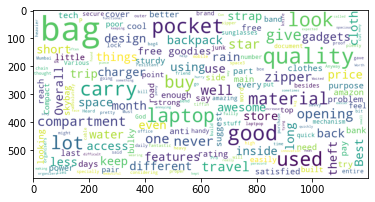

NameError: name 'show_wordcloud' is not defined

In [43]:
plt.imshow(wordcloud)
plt.show()
show_wordcloud(df["Comments"])
show_wordcloud(df["Title"])

In [44]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Comments", "pos"]].head(10)

,Comments,pos
4,"Best Tech & Tour Bag.I have used AT, skybag,...",0.248
7,It's a Supreme Built Quality and it's Finish...,0.188
1,Heard about this bag from a friend then thou...,0.186
5,Look is good but quality of the material is ...,0.183
8,This company is mentioning in its pamphlet i...,0.168
0,"1. Material used in the bag is good, chain ...",0.165
3,That's called something different . As i was...,0.154
9,I am giving review after using it for my USA...,0.117
2,"I have been using it for a month or so, the ...",0.106
6,I was looking for a travel bag for short tri...,0.104


In [45]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Comments", "neg"]].head(10)

,Comments,neg
1,Heard about this bag from a friend then thou...,0.118
8,This company is mentioning in its pamphlet i...,0.095
9,I am giving review after using it for my USA...,0.091
2,"I have been using it for a month or so, the ...",0.057
4,"Best Tech & Tour Bag.I have used AT, skybag,...",0.048
3,That's called something different . As i was...,0.034
0,"1. Material used in the bag is good, chain ...",0.014
6,I was looking for a travel bag for short tri...,0.009
5,Look is good but quality of the material is ...,0.000
7,It's a Supreme Built Quality and it's Finish...,0.000
